In [40]:
import os
import glob
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.keras.utils.set_random_seed(111)

import warnings
warnings.filterwarnings('ignore')

## Functions to visualize and load samples:-

In [41]:
def load_sample(output_size=(300,300)):
    sample = keras.utils.get_file(
        "sample.jpg",
        "https://t3638486.p.clickup-attachments.com/t3638486/a0a4f633-2963-4e06-acae-2ad1d12eba3e/sample.jpg",
    )

    sample = keras.utils.load_img(sample, target_size=output_size)

    sample = keras.utils.img_to_array(sample)

    return sample

In [42]:
# Visualizing Sample:-

def show_images(imgs, num_rows, num_cols, scale=2):
    aspect_ratio = imgs[0].shape[0]/imgs[0].shape[1]

    figsize = (num_cols * scale  , num_rows * scale * aspect_ratio)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i in range(num_rows):
        for j in range(num_cols):
            if num_rows != 1:       
                # Converts each image tensor to a NumPy array and displays it using imshow
                axes[i][j].imshow(imgs[i * num_cols + j].numpy().astype("uint8"))
                axes[i][j].axes.get_xaxis().set_visible(False)    # Removes axis labels to keep the display clean
                axes[i][j].axes.get_yaxis().set_visible(False)
            else:
                plt.imsave('test.png', imgs[i * num_cols + j].numpy()[0].astype("uint8"))
                axes[j].imshow(imgs[i * num_cols + j].numpy().astype("uint8"))
                axes[j].axes.get_xaxis().set_visible(False)
                axes[j].axes.get_yaxis().set_visible(False)

    plt.subplots_adjust(hspace=0.1, wspace=0)   

    return axes

In [43]:
def apply(img, aug, num_rows=1, num_cols=4, scale=3):
    
    # apply augmentation multiple times to obtain different samples
    Y = [aug(img) for i in range(num_rows * num_cols)]
    
    show_images(Y, num_rows, num_cols, scale)      # scale controls the size of the displayed images

## Basic Augmentation Techniques using `tf.keras.layers.*` and `tf.image`
All these augmentation techniques will only apply if the mode is set to training!

In [44]:
# Required to reset the mode to training!
tf.keras.backend.clear_session()

### 1. RandomCrop:-

In [45]:
sample = load_sample(output_size=(300,300))
sample

array([[[153., 149., 120.],
        [156., 153., 122.],
        [153., 148., 116.],
        ...,
        [170., 150., 126.],
        [171., 153., 131.],
        [174., 157., 139.]],

       [[157., 153., 124.],
        [160., 155., 125.],
        [159., 153., 121.],
        ...,
        [165., 149., 124.],
        [164., 152., 128.],
        [166., 155., 133.]],

       [[153., 146., 118.],
        [160., 153., 124.],
        [165., 156., 125.],
        ...,
        [155., 140., 117.],
        [154., 142., 116.],
        [161., 151., 124.]],

       ...,

       [[183., 159., 135.],
        [163., 135., 113.],
        [159., 133., 110.],
        ...,
        [173., 159., 124.],
        [175., 158., 114.],
        [194., 173., 130.]],

       [[201., 181., 154.],
        [193., 169., 143.],
        [168., 144., 118.],
        ...,
        [165., 141., 105.],
        [145., 120.,  79.],
        [195., 171., 127.]],

       [[195., 182., 150.],
        [198., 181., 151.],
        [186., 1

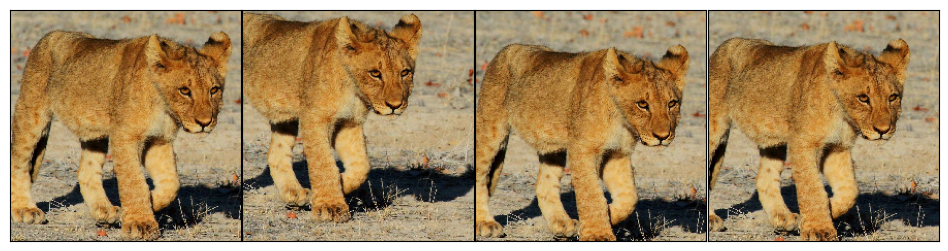

In [46]:
from keras.layers import RandomCrop

aug_layer = RandomCrop(
    height = 224,
    width = 224,
)

apply(sample, aug_layer)

In [47]:
random_crop = tf.image.random_crop(value=sample, size=(224,224,3))
random_crop

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[150., 144., 118.],
        [157., 151., 125.],
        [160., 154., 128.],
        ...,
        [194., 133.,  76.],
        [190., 135.,  78.],
        [194., 148.,  89.]],

       [[150., 143., 114.],
        [157., 150., 122.],
        [161., 154., 128.],
        ...,
        [197., 129.,  68.],
        [184., 124.,  61.],
        [191., 140.,  77.]],

       [[155., 145., 118.],
        [167., 151., 128.],
        [164., 152., 128.],
        ...,
        [183., 122.,  57.],
        [184., 129.,  65.],
        [194., 144.,  85.]],

       ...,

       [[181., 161., 128.],
        [168., 147., 118.],
        [167., 148., 108.],
        ...,
        [163., 148., 117.],
        [174., 161., 126.],
        [170., 154., 118.]],

       [[175., 156., 123.],
        [154., 138.,  89.],
        [167., 150., 106.],
        ...,
        [183., 160., 126.],
        [200., 186., 151.],
        [152., 138., 103.]],

       [[158., 14

### 2. RandomTranslation:-

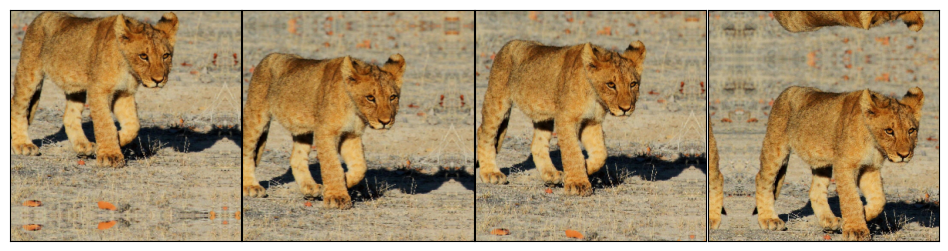

In [48]:
from keras.layers import RandomTranslation

sample = load_sample(output_size=(300, 300))
aug_layer = RandomTranslation(
    height_factor = (-0.2, 0.3),
    width_factor = (-0.2, 0.3),
)

apply(sample, aug_layer)

In [49]:
# Alternative Implementation using tf.image
random_shift = tf.keras.preprocessing.image.random_shift(sample, hrg = 0.2, wrg = 0.5)

### 3. RandomRotation:-

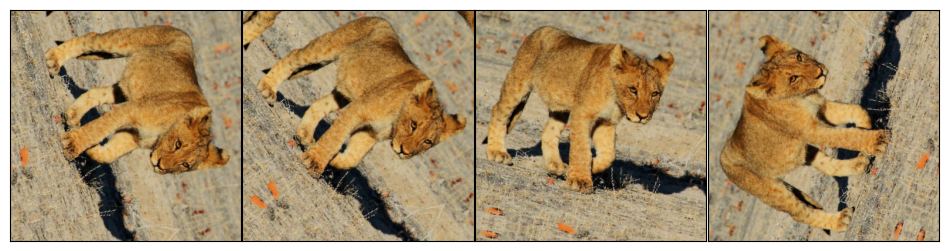

In [51]:
from keras.layers import RandomRotation

sample = load_sample(output_size=(300,300))
aug_layer = RandomRotation(
    factor= (-0.2, 0.3)
)

apply(sample, aug_layer)

In [52]:
# Alternative Implementation using tf.image
random_rotation = tf.keras.preprocessing.image.random_rotation(sample, rg=500, channel_axis=2, row_axis=0, col_axis=1)

### 4. RandomFlip:-

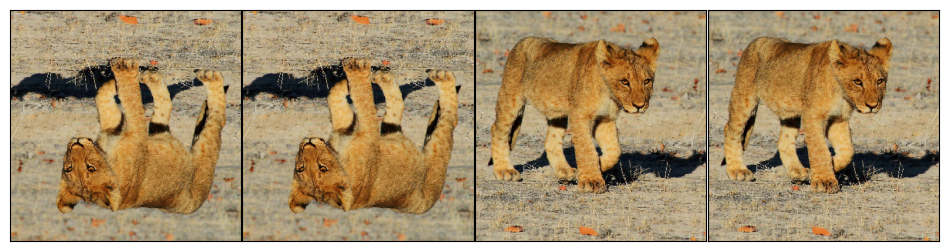

In [53]:
from keras.layers import RandomFlip

sample = load_sample(output_size=(300, 300))
aug_layer = RandomFlip()

apply(sample, aug_layer)

In [54]:
# Alternative Implementation using tf.image
randomflip = tf.image.random_flip_left_right(sample, 10)

### 5. RandomBrightness:-

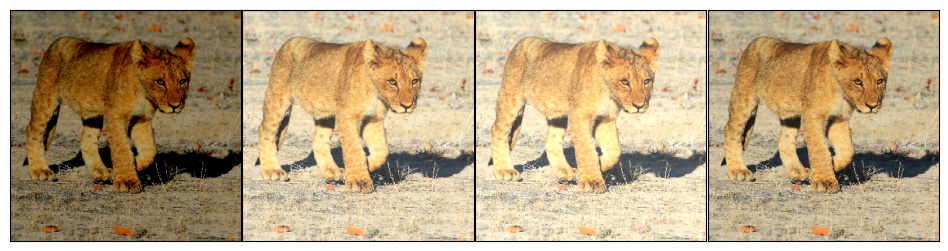

In [55]:
from tensorflow.keras.layers import RandomBrightness

sample = load_sample(output_size=(300, 300))
aug_layer = RandomBrightness(factor=(-0.2, 0.5))

apply(sample, aug_layer)

In [56]:
# Alternative Implementation using tf.image
random_bright = tf.image.random_brightness(sample, 100)

### 6. RandomContrast:-

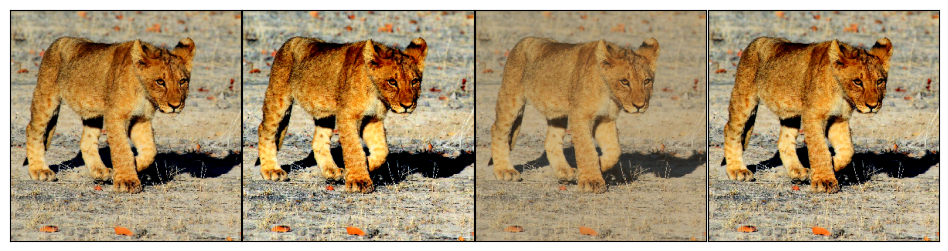

In [57]:
from keras.layers import RandomContrast

sample = load_sample(output_size=(300, 300))
aug_layer = RandomContrast(factor=(0.5, 0.9))

apply(sample, aug_layer)

In [58]:
# Alternative Implementation using tf.image
random_contrast = tf.image.random_contrast(sample, 0.5, 10)